## TL;DR
Metropolis is an amazing algroithm that lets us sample from an arbitrary distribution. We need to provide a symmetric proposal distribution at each possible state in order to kickstart the algorithm, however.

But you should really read.

## Recap
So far, we've seen that markov processes can and often do converge to a specific distribution based only on the transition matrix and regardless of starting state. We've even seen the exact conditions we require. 

We've also noted that if we pick a clever transition matrix we can force the stationary distribution to be a distribution we care about, and that we can get samples from that distribution by simply running the updates suggested by the transition matrix.

## Metropolis Algorithm
The Metropolis algorithm is a way of building a transition matrix that converges to a distribution of interest $p(x)$. 

To focus its effort, the Metropolis algorithm doesn't build the transition matrix from scratch, it uses pre-existing transition matrix and edits that matrix. Further, the matrix it produces will obey detailed balance with $p(x)$, rather than just stationarity.

Importantly, Metropolis won't build out the whole transition matrix, it will just make needed edits on the fly. Likewise, the Metropolis algorithm won't require us to know $p(x)$ exactly, but only up to a missing constant factor (which occurs a TON in practice with Bayes theorem, where the numerator is easy to find but the normalizing constant is difficult)


### Algorithm
Input: 

1. A distribution we want to sample from $p(x)$
2. A proposal distribution at each value of x. 
    - The family can be written $q(x_{new}|x)$ or $T(x_{new}|x)$. For either one we supply an x and get the probability of moving to any value $x_{new}$ 
    - The proposal is chosen by the user and is a matter of some art. It must be possible to sample from $q$. 
    - Further, the probability of a move from $x$ to $x_{new}$ must match the probability of a move from $x_{new}$ to $x$. 
    - For these reasons, it is very popular to choose (for all x) a symetric distribution centered on the current x value, e.g. $q(x_{new}|x)= normal(x,\sigma)$
3. Number of iterations

Output:

1. One sample per iteration from a markov chain whose stationary distribution is $p(x)$.

<b>
Procedure:
1. Arbitrarially pick an intital state (i.e. pick a value for x).
2. Plug that x into $q(x_{new}|x)$ to get a probability distribution of possible $x_{new}$ values, and sample to get a particular value of $x_{new}$.
4. Roll Uniform(0,1). 
5. IF the value above is less than $\frac{p(x_{new})}{p(x)}$, $x$ becomes $x_{new}$
6. ELSE x is unchanged
7. Record the present value of x as a sample from the chain and go to 2. </b>

### Explanation
Metropolis places a traffic cop on the road between each state. Each time the red ferrari tries to cross that road the cop has a chance of catching the ferrari and making it stay where it was.

In particular, if the destination state is more probable under $p$ than the  origin state, the move is always allowed. This helps probability flow to states that are more likely under $p$. Further, if the destination state is 10 times less common under $p$ than the origin state the move is only allowed 1/10 of the time. Again, this favors spending time in states that are more probable under $p$.

The net effect is to edit the transition probabilities specified by $q(x_{new}|x)$. If the transition is to a more probable sate under $p$, it's left unchanged. If the transition is to a less probable state, it's diminished. Finally, the diagonal entries grow since transitions from $x$ to $x$ happen when a move is rejected.


### Proof
We'll show that Metropolis obeys detailed balance under $p$ and that $p(x)$ is thus the stationary distribution of the edited chain.

#### Writing the transition probability
The transition matrix (or kernel) can be written in this form for Metropolis:

$$T(x_{new} \vert x) = q(x_{new} \vert x)\,A(x_{new}, x) +  \delta(x==x_{new})r(x)$$

where

$$A(x_{new}, x) = min(1,  \frac{p(x_{new})}{p(x)})$$ 

is the Metropolis acceptance probability (you propose the move and accept it) and 

$$r(x) = \int q(y \vert x)(1 - A(y, x)) dy$$ is the total probability of rejecting a move that starts at x. 

#### Reading the transition probbility
Let's parse the terms above:

- the transition probability has two terms: one for accepted moves that end at $x_{new}$ and one for rejected terms that end at $x_{new}$
- the first term is the probability of moving to $x_{new}$ from $x$: The chance of proposing $x_{new}$ while at $x$ times the probability of accepting that move
- the second term starts with a delta function, so $r(x)$ is present when x==x_new and is absent otherwise. $r(x)$ of rejecting a move away from x (i.e. of rejecting a move away from $x_{new}$

#### Checking detailed balance
Detailed balance requires that when stocks are according to $p(x)$ flow from A to B match flow from B to A for all such pairs. So we want to show that $T( x \vert x_{new})p(x_{new}) = T( x_{new} \vert x )p(x)$.

Plugging in the transition probabilites above,

$$p(x_{new}) T( x \vert x_{new} ) =  p(x_{new}) q(x \vert x_{new})\,A(x, x_{new}) +  p(x_{new}) \delta(x_{new} == x)r(x_{new})$$

$$p(x)T( x_{new} \vert x ) =  p(x) q(x_{new} \vert x)\,A(x_{new}, x) +  p(x)\delta(x==x_{new})r(x)$$

We said that the terms after the plus sign are zero when $x\ne x_{new}$. When $x=x_{new}$ the terms are still equal, so remove them from consideration.

Assume, without loss of generality that $p(x) < p(x_{new})$, so that moves from $x$ to $x_{new}$ are always accepted and $A(x_{new}, x)$ is 1. 

The first term of the second expression is now just $p(x) q(x\vert x_{new} )$.

The first term in the first expression is $p(x_{new}) q(x \vert x_{new}) \frac{p(x)}{p(x_{new})}$,

So Metropolis obeys detailed balance iff 

$$p(x) q(x\vert x_{new} ) = p(x_{new}) q(x \vert x_{new}) \frac{p(x)}{p(x_{new})}$$

$$q(x\vert x_{new} ) = q(x_{new} \vert x)$$

Since the proposals are symmetric, detailed balance holds and $p(x)$ is the stationary distribution of the edited transition probabilites, as desired.

### Aperiodic, etc
Detailed balance assures us we have the intended stationary distribution. Will the chain converge there? We need to check the other properties.

The possibility of rejection in the Metropolis algorithm based on the throw of a random uniform makes the chain aperiodic. And if we want it to be irreducible, we need to make sure $q$ can go everywhere that $p$ can (eventually), i.e. support of $p$ is covered by the support of at least some $q$. Picking an unbounded distribution at each x is an easy guarantee, though.


## Example
We'll sample normally distirbuted numbers without involving Box-Muller.

We choose Uniform[x-1,x+1] as our proposal distribution for any given x. If you want, tinker with smaller or wider proposals and even with a non-symmetric one.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from scipy.stats import norm
%matplotlib inline

def metropolis(p, qdraw, nsamp, xinit):
    #p returns the pdf of p at any given x
    #when given an x, q_draw gives a sample from the proposal q(x_new|x)
    samples=np.empty(nsamp)
    x_prev = xinit
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        if np.random.uniform() < min(1, pdfratio):
            samples[i] = x_star
            x_prev = x_star
        else:#we always get a sample
            samples[i]= x_prev
            
    return samples

In [4]:
uni = uniform(-1, 2) #left bound, range

#function to return a sample uniformly from [x-1 to x+1]
def uniprop(xprev):
    return xprev+uni.rvs()

samps = metropolis(norm.pdf, uniprop, 30000, 0.0)

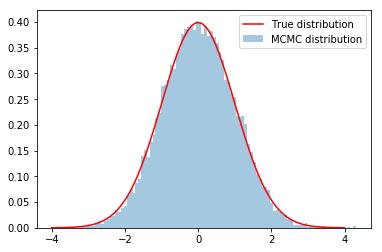

starting point was  0.0


In [5]:
# plot our sample histogram
plt.hist(samps,bins=100, alpha=0.4, label=u'MCMC distribution', normed=True) 

#plot the true function
xxx= np.linspace(-4,4,1000)
plt.plot(xxx, norm.pdf(xxx), 'r', label=u'True distribution') 
plt.legend()

plt.show()
print("starting point was ", 0.0)

So there it is, our samples are normally distributed. With more samples we'll get even more accurate.

## Why not Rejection Sampling, etc?

We've learnt how to do the inverse transform and how to use rejection sampling with a majorizing function. So why not use these methods to sample a distribution?

It can be hard to find a majorizing $g(x)$ and this gets even harder for multidimensional $g(x)$...and to boot less efficient as you leave more and more space out. Also, our general ideais to compute expectations as sample averages, and majorizing in multiple dimensions can have us spending a lot of time in tails of distributions.

Also note that the integrals being calculated in these expectations are of the type:

$$E_f[g] = \int dV f(x) g(x).$$

In multiple domensions, volume elements get smaller and smaller...the curse of dimensionality. This can be seen in the diagram :

![](images/cod.png)

(image from Betancourt)

where the centre-partitions combination to an integral goes from 1/3rd to 1/27th. Now suppose the  mode of the distibution is contained in this partition: then its contribution to the integral is going down with dimensions.

As the centre volume decreases, the outer volume increases, but this is in distribution tails, so we dont get much of a contribution from there either:

![](images/cod2.png)

(image from Betancourt)

(the slivers outside increase).

It is the neighborhood between these extremes, called the **typical set** which our sampler must explore well. And to get a good rejection sampling majorizer for this becomes hard.

We'll come back to this picture later...